In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SuspensionParts import Wishbone
from SuspensionParts import Upright
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

In [ ]:
# define chassis pickup points
# origin at center of rear axle on ground
# F/R - front/rear of car
# r/l - right/left
# U/L - upper/lower
# 1/2/3 - 1=front/2=rear/3=upright of the specific wishbone

# Should make control arm and upright classes to make this easier

x1 = np.array([0,0,1])
x2 = np.array([0,0,0])
x3 = np.array([1,0,0])

test_wishbone = Wishbone(x1, x2, x3)

# front right corner
# upper
FrU1 = np.array([1.9,-.4,.35])
FrU2 = np.array([1.7,-.4,.4])
FrU3 = np.array([1.8,-.6,.375])

# lower
FrL1 = np.array([1.9,-.4,.15])
FrL2 = np.array([1.7,-.4,.2])
FrL3 = np.array([1.8,-.6,.175])

FR_upper = Wishbone(FrU1, FrU2, FrU3)
FR_lower = Wishbone(FrL1, FrL2, FrL3)

In [11]:
theta = np.deg2rad(-90)
# print(theta)
print(FR_upper.rotation(theta))
print(test_wishbone.rotation(theta))

[ 1.84850713 -0.4         0.5690285 ]
[ 6.123234e-17 -1.000000e+00  0.000000e+00]


In [26]:
dtheta = np.deg2rad(5)
theta_total = 0
max_angle = np.deg2rad(360)
steps = int(max_angle / dtheta)

balljoint_pos = np.zeros((steps, 3))

for i in range(steps):
    balljoint_pos[i] = FR_upper.rotation(theta_total)       
    theta_total += dtheta

In [27]:
def is_plane_orthogonal_to_axis(plane_pts, axis_pts, tol=1e-6):
    """
    Check if the plane defined by 3 points is orthogonal to the axis defined by 2 points.

    Parameters:
        plane_pts: np.ndarray of shape (3, 3) - three points defining the plane.
        axis_pts: np.ndarray of shape (2, 3) - two points defining the axis.
        tol: float - tolerance for checking orthogonality (default: 1e-6)

    Returns:
        bool - True if orthogonal, False otherwise.
    """

    # Vectors on the plane
    v1 = plane_pts[1] - plane_pts[0]
    v2 = plane_pts[2] - plane_pts[0]

    # Normal to the plane
    normal = np.cross(v1, v2)

    # Direction vector of the axis
    axis_vec = axis_pts[1] - axis_pts[0]

    # Normalize both vectors (optional for numerical stability)
    normal = normal / np.linalg.norm(normal)
    axis_vec = axis_vec / np.linalg.norm(axis_vec)

    # Check dot product
    dot_product = np.dot(normal, axis_vec)

    return abs(abs(dot_product) - 1) < tol

# ax = np.array([[0,0,1], [0,0,0]])
ax = np.array([[1.9,-.4,.35], [1.7,-.4,.4]])
print(is_plane_orthogonal_to_axis(balljoint_pos, ax, tol=1e-6))

True


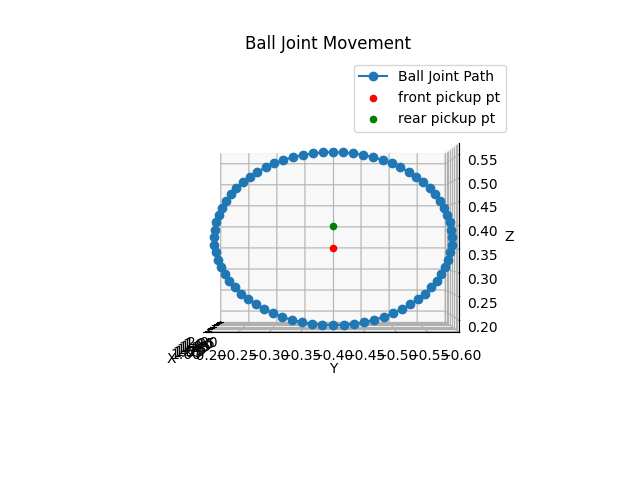

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Unpack x, y, z from balljoint_pos
x = balljoint_pos[:, 0]
y = balljoint_pos[:, 1]
z = balljoint_pos[:, 2]

# Plot the points
ax.plot3D(x, y, z, 'o-', label='Ball Joint Path')  # 'o-' for points connected with lines
ax.scatter(FrU1[0], FrU1[1], FrU1[2], color = 'red', label = 'front pickup pt')
ax.scatter(FrU2[0], FrU2[1], FrU2[2], color = 'green', label = 'rear pickup pt')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Ball Joint Movement')
ax.legend()
# Set the view: positive X into page, -Y to the right, Z up
ax.view_init(elev=0, azim=180)

# Combine all points for axis range calculation
all_x = np.concatenate([x, [FrU1[0], FrU2[0]]])
all_y = np.concatenate([y, [FrU1[1], FrU2[1]]])
all_z = np.concatenate([z, [FrU1[2], FrU2[2]]])

# Compute ranges and midpoints
x_range = all_x.max() - all_x.min()
y_range = all_y.max() - all_y.min()
z_range = all_z.max() - all_z.min()
max_range = max(x_range, y_range, z_range)

x_middle = (all_x.max() + all_x.min()) / 2
y_middle = (all_y.max() + all_y.min()) / 2
z_middle = (all_z.max() + all_z.min()) / 2

ax.set_xlim(x_middle - max_range/2, x_middle + max_range/2)
ax.set_ylim(y_middle - max_range/2, y_middle + max_range/2)
ax.set_zlim(z_middle - max_range/2, z_middle + max_range/2)

plt.show()

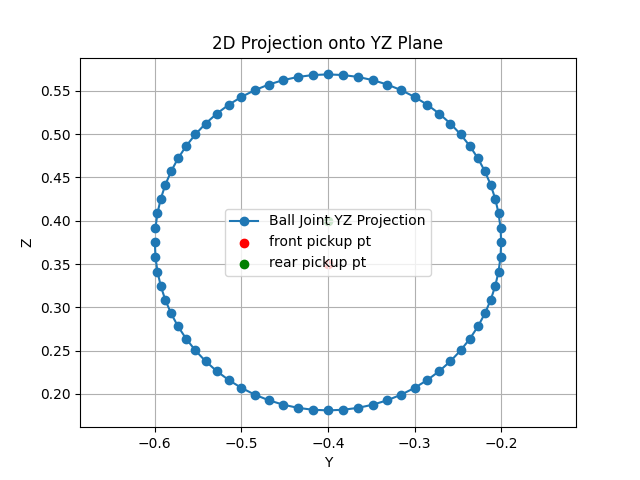

In [24]:
plt.figure()
plt.plot(y, z, 'o-', label='Ball Joint YZ Projection')
plt.scatter(FrU1[1], FrU1[2], color='red', label='front pickup pt')
plt.scatter(FrU2[1], FrU2[2], color='green', label='rear pickup pt')
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('2D Projection onto YZ Plane')
plt.legend()
plt.axis('equal')  # Optional: keeps aspect ratio equal
plt.grid(True)
plt.show()

In [8]:
FR_upper = Wishbone(FrU1, FrU2, FrU3)
FR_lower = Wishbone(FrL1, FrL2, FrL3)
joint_dist = .2
upper_pos = FR_upper.rotation(np.deg2rad(5))

dtheta = np.deg2rad(0.01)
max_angle = np.deg2rad(40)
steps = int(max_angle/dtheta)

theta = 0
theta_close = 0
closest_dist = 10

for i in range(steps):
    lower_pos = FR_lower.rotation(theta)
    dist = np.linalg.norm(upper_pos - lower_pos)
    theta += dtheta
    
    if abs(dist - joint_dist) < abs(closest_dist - joint_dist):
        closest_dist = dist
        theta_close = theta

rotation_needed = np.rad2deg(theta_close)
print(rotation_needed)
print(closest_dist)
FR_lower = Wishbone(FrL1, FrL2, FrL3)
lower_pos = FR_lower.rotation(theta_close)
print(lower_pos)
print(upper_pos)



5.010000000000052
0.2000000000000002
[ 1.79576389 -0.59923589  0.15805557]
[ 1.79577233 -0.59923894  0.3580893 ]


5.000000000000052


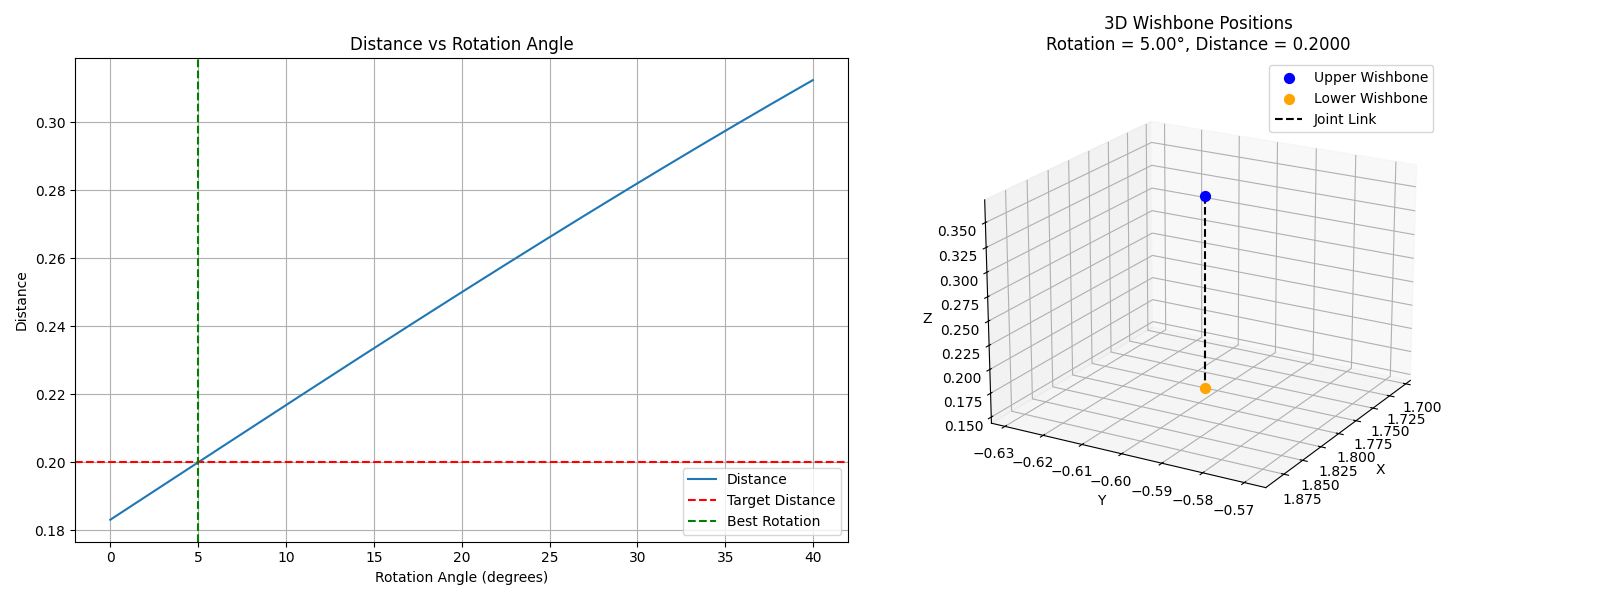

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting

# Data collection for plotting
theta_vals = []
distance_vals = []

# Reset variables
theta = 0
closest_dist = 10
theta_close = 0

# Sweep rotation and track distances
for i in range(steps):
    lower_pos = FR_lower.rotation(theta)
    dist = np.linalg.norm(upper_pos - lower_pos)
    
    theta_vals.append(np.rad2deg(theta))
    distance_vals.append(dist)
    
    if abs(dist - joint_dist) < abs(closest_dist - joint_dist):
        closest_dist = dist
        theta_close = theta

    theta += dtheta

# Final best rotation and positions
rotation_needed = np.rad2deg(theta_close)
FR_lower = Wishbone(FrL1, FrL2, FrL3)
lower_pos = FR_lower.rotation(theta_close)

print(rotation_needed)
# --- PLOTTING ---

fig = plt.figure(figsize=(16, 6))

# 1. Distance vs Angle (2D)
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(theta_vals, distance_vals, label='Distance')
ax1.axhline(y=joint_dist, color='r', linestyle='--', label='Target Distance')
ax1.axvline(x=rotation_needed, color='g', linestyle='--', label='Best Rotation')
ax1.set_xlabel("Rotation Angle (degrees)")
ax1.set_ylabel("Distance")
ax1.set_title("Distance vs Rotation Angle")
ax1.legend()
ax1.grid(True)

# 2. 3D position of upper and lower wishbones
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(*upper_pos, color='blue', label='Upper Wishbone', s=50)
ax2.scatter(*lower_pos, color='orange', label='Lower Wishbone', s=50)
ax2.plot([upper_pos[0], lower_pos[0]],
         [upper_pos[1], lower_pos[1]],
         [upper_pos[2], lower_pos[2]],
         'k--', label='Joint Link')

ax2.set_title(f"3D Wishbone Positions\nRotation = {rotation_needed:.2f}°, Distance = {closest_dist:.4f}")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.legend()
ax2.view_init(elev=20, azim=30)  # Adjust the view angle if needed

plt.tight_layout()
plt.show()
